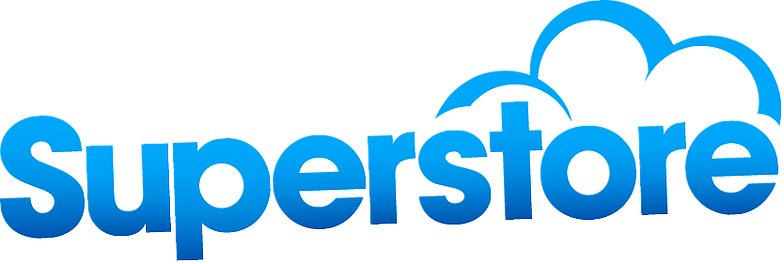

# **Entrega del Proyecto Final**

**Nombre:** Leandro Montes Catari.

**Comisión:** 46320 - Data Science.

**Tutor:** Ernesto Surijon Frimis.

## **Abstracto con motivación y audiencia**

Este conjunto de datos `Super Sales Store` contiene datos de aproximadamente 10.000 registros de venta de una tienda en Estados Unidos en un periodo determinado. El conjunto de datos incluye datos categóricos de productos, clientes, tipos de envío y datos demográficos de los clientes. Las variables numéricas más importantes son el monto de las ventas, las ganancias, la cantidad de producto y los descuentos.

Este análisis de datos puede resultar de gran utilidad para una variedad de audiencias, incluidos gerentes y propietarios de tiendas minoristas que deseen comprender mejor el rendimiento de sus productos y clientes. También puede ser de interés para analistas de mercado que buscan identificar tendencias de compra y preferencias de los clientes. Además, los especialistas en logística y gestión de inventarios podrían beneficiarse al identificar patrones de demanda y optimizar las estrategias de almacenamiento y distribución.

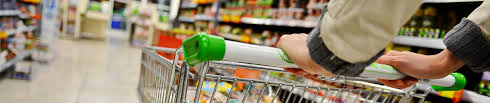

✅ **Objetivo**

El objetivo principal de esta investigación es descubrir información procesable a partir de datos de ventas que puedan ayudar a la tiendan a tomar decisiones. El análisis se centrará en comprender el comportamiento de los clientes, las tendencias de ventas y el desempeño regional para identificar oportunidades de mejora y maximización de ventas y ganancias.


✅ **Contexto Empresarial**

La empresa enfrenta el desafío de aumentar las ganancias, adquirir nuevos clientes y expandirse a nuevos mercados para seguir siendo competitiva y lograr un crecimiento sostenible.


✅ **Problema Comercial**

La empresa necesita identificar áreas de mejora en sus estrategias de ventas, orientación a clientes y expansión regional para maximizar la rentabilidad. Por lo que analizaremos a fondo los datos y con ayuda de las visualizaciones podremos dar respuesta a las preguntas que se nos vayan presentando.


✅ **Contexto Analitico**

Esta investigación empleará técnicas de análisis datos para extraer información significativa del conjunto de datos. Los hallazgos se utilizarán para informar decisiones comerciales e impulsar iniciativas de crecimiento estratégico.


✅ **Diccionario**


`Row ID` = ID único para cada fila.

`Order ID` = ID de pedido único para cada Cliente.

`Order Date` = Fecha de pedido del producto.

`Ship Date` = Fecha de Envío del Producto.

`Ship Mode` = Modo de Envío especificado por el Cliente.

`Customer ID` = ID único para identificar a cada Cliente.

`Customer Name` = Nombre del Cliente.

`Segment` = El segmento al que pertenece el Cliente.

`Country` = País de residencia del Cliente.

`City` = Ciudad de residencia del Cliente.

`State` = Estado de residencia del Cliente.

`Postal Code` = Código Postal de cada Cliente.

`Region` = Región a la que pertenece el Cliente.

`Product ID` = ID único del Producto.

`Category` = Categoría del producto solicitado.

`Sub-Category` = Subcategoría del producto solicitado.

`Product Name` = Nombre del Producto.

`Sales` = Ventas del Producto.

`Quantity` = Cantidad del Producto.

`Discount` = Descuento proporcionado.

`Profit` = Beneficio.

##**Preguntas / Hipotesis**

En base a entregas anteriores y para complementar el estudio se realizan las siguientes preguntas, que se iran respondiendo en el desarrollo de este estudio.

1. ¿Cómo han cambiado las ventas con el tiempo?
2. ¿Qué regiones están obteniendo buenos resultados y cuáles necesitan mejorar en términos de ventas?
3. ¿Qué segmentos de clientes son más propensos a comprar en cada región?
4. ¿Qué categoría de productos genera las mayores ingresos y ganancias?

##**Importación de Librerias y Lectura de Archivo .CSV**

In [ ]:
#!pip install catboost #Instalamos CatBoost para poder importar CatBoostRegressor

In [ ]:
# Importamos librerias que estaremos usando
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings, joblib, gc, re, time
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [ ]:
# Conectamos google colab al drive.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Leemos el Archivo .csv
data = pd.read_csv('/content/gdrive/MyDrive/Colab-Notebooks/Superstore Sales/Superstore.csv', encoding='windows-1254')

## **Exploración de Datos**

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
data.shape

(9994, 21)

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Verificamos si tenemos valores que se duplicados.
(data.duplicated().sum())
print(f'Contamos con un total de {data.duplicated().sum()} valores duplicados')

Contamos con un total de 0 valores duplicados


In [ ]:
data = data.drop_duplicates()
data.shape

(9994, 21)

In [ ]:
#Verificamos si contamos con datos nulos en el dataset
print(data.isna().sum())
print(f'Contamos con un total de {data.isnull().sum().sum()/data.shape[0] * 100} valores NaN')

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Contamos con un total de 0.0 valores NaN


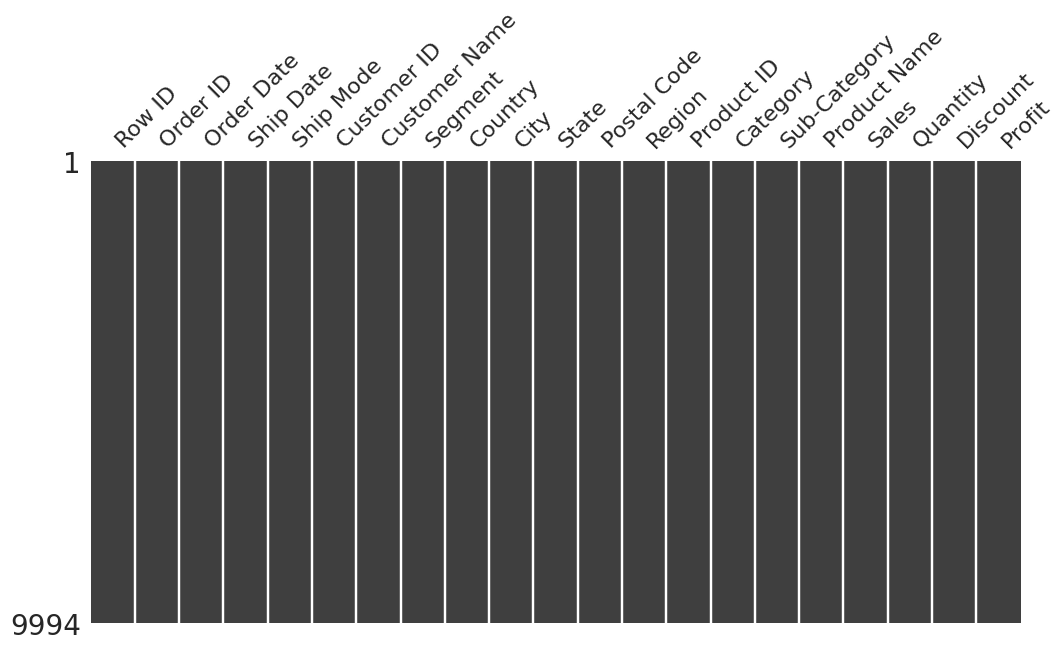

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
msno.matrix(data, ax=ax)
plt.show()

## **Analisis Exploratorio de los Datos (EDA)**

In [ ]:
sales = go.Box(x=data['Sales'],name='Sales ')
Quantity = go.Box(x=data['Quantity'],name='Quantity ')
Profit = go.Box(x=data['Profit'],name='Profit ')
Discount = go.Box(x=data['Discount'],name='Discount ')
fig = make_subplots(rows=2, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Quantity, row = 1, col = 2)
fig.append_trace(Profit, row = 2, col = 1)
fig.append_trace(Discount, row = 2, col = 2)
fig.update_layout(height=600, width=1100, title_text = 'Distribución de los datos numericos', title_font_size = 24, title_x=0.45)
fig.show()

Podemos apreciar que tenemos bastantes outliers en nuestra variable objetivo `Profit` y en `Sales` estos los estaremos reduciendo mas adelante.

In [ ]:
ship_mode = go.Histogram(x=data["Ship Mode"],name="Ship Mode")
segment = go.Histogram(x=data["Segment"],name="Segment")
Region = go.Histogram(x=data["Region"],name="Region")
category = go.Histogram(x=data["Category"],name="Category")
fig = make_subplots(rows=2, cols=2)
fig.append_trace(ship_mode, row = 1, col = 1)
fig.append_trace(segment, row = 1, col = 2)
fig.append_trace(Region, row = 2, col = 1)
fig.append_trace(category, row = 2, col = 2)
fig.update_layout(height=600, width=1100,title_text = 'Numero de ocurrencias en los datos Categoricos', title_font_size = 24, title_x=0.45)
fig.show()

*   **Categorias con mayores ocurrencias.**
    *   Ship Mode: `Standar Class`
    *   Segment: `Consumer`
    *   Region: `West` seguida muy de cerca por `East`
    *   Category: `Office Supplies`


*   **Categorias con menores ocurrencias.**
    *   Ship Mode: `Same Day`
    *   Segment: `Home Office`
    *   Region: `South`
    *   Category: `Technology`

In [ ]:
#Creamos nuevas variables para analizar datos a lo largo del tiempo.
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')
data['Year'] = data['Order Date'].dt.year
data["Month"] = pd.DatetimeIndex(data["Order Date"]).month
data["Month Name"] = data["Order Date"].dt.month_name()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
yearSales = data.groupby('Year')[['Sales','Profit']].sum().reset_index()
fig = px.line(yearSales, x='Year', y=['Sales', 'Profit'], title='Distribución de Ventas/Ganancias por Año')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Pregunta 1. ¿Cómo han cambiado las ventas con el tiempo?

Respuesta, para los datos que estamos analizando podemos notar que a traves de los años las ventas han aumentado desde su inicio en el 2014, por lo que podemos suponer que su tendencia seguira en alza para los proximos años (Despues del 2017).

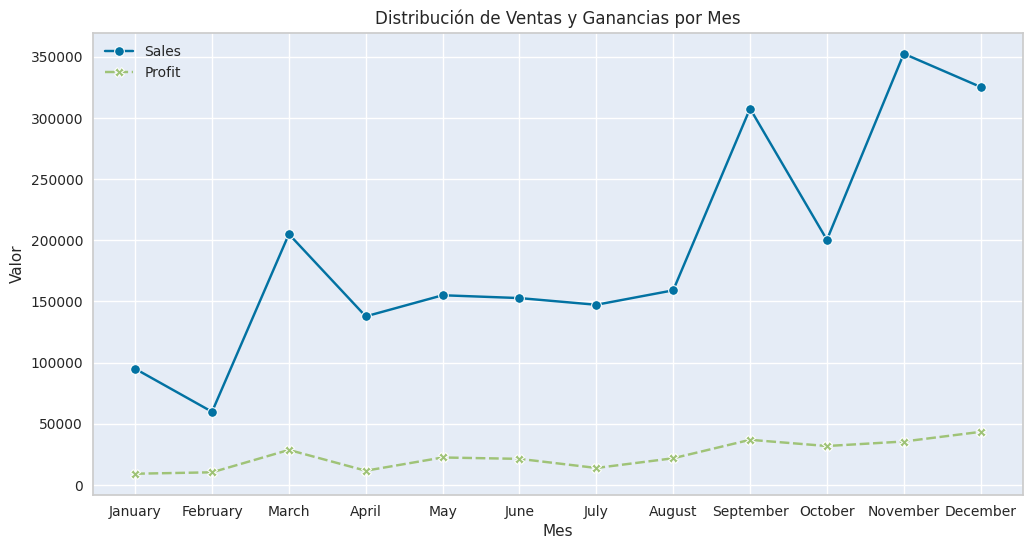

In [ ]:
monthSales = data[["Sales","Profit","Month Name"]].groupby(by="Month Name").sum()
ordenar = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #Ordenar por Nombre del mes
monthSalesOrd = monthSales.reindex(ordenar, axis=0)
plt.figure(figsize=(12,6))
plt.title("Distribución de Ventas y Ganancias por Mes")
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
a = sns.lineplot(data=monthSalesOrd, markers=True, legend=True)
a.set_xlabel("Mes")
a.set_ylabel("Valor")
plt.show()

Para complementar la respuesta de la pregunta 1, en esta grafica podemos notar que los mejores meses de venta son `Noviembre` y `Diciembre`, esto se debe quizas a que es temporada decembrina, despues de esto podemos notar la baja los primeros meses `Enero` y `Febrero`.

In [ ]:
meanSalesYear = data.groupby('Year')[['Sales']].mean().reset_index()
fig = px.line(meanSalesYear, x='Year', y=['Sales'], title='Media de las Ventas por Año')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Por el grafico podemos notar que la media de las ventas mas alta fue en el año 2014, luego en 2016 intento repuntar pero aun asi no logro superar el maximo historico, en 2017 cae pero hay que considerar que no tenemos los datos completos de este año 2017.

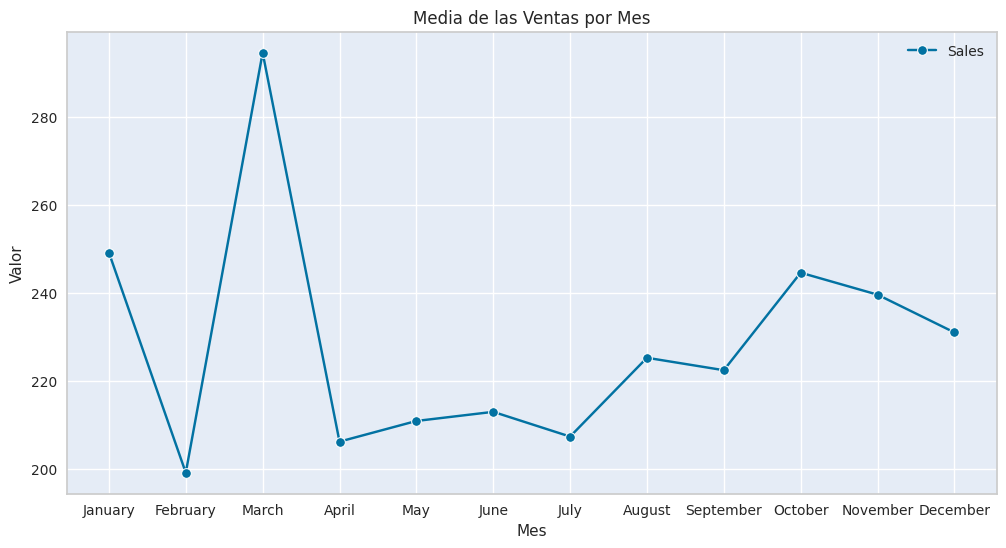

In [ ]:
meanSalesMonth = data.groupby('Month Name')[['Sales']].mean()
meanSalesMonth = meanSalesMonth.reindex(ordenar, axis=0)
plt.figure(figsize=(12,6))
a = sns.lineplot(data=meanSalesMonth, markers=True, legend=True)
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
a.set_xlabel("Mes")
a.set_ylabel("Valor")
a.set_title("Media de las Ventas por Mes")
plt.show()

Podemos notar que el mes con la media mas alta es en marzo. Despues de ahi su tendencia es al alza pero aun asi no supera su maximo.

In [ ]:
medianSalesYear = data.groupby('Year')[['Sales']].median().reset_index()
fig = px.line(medianSalesYear, x='Year', y=['Sales'], title='Mediana de las Ventas por Año')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

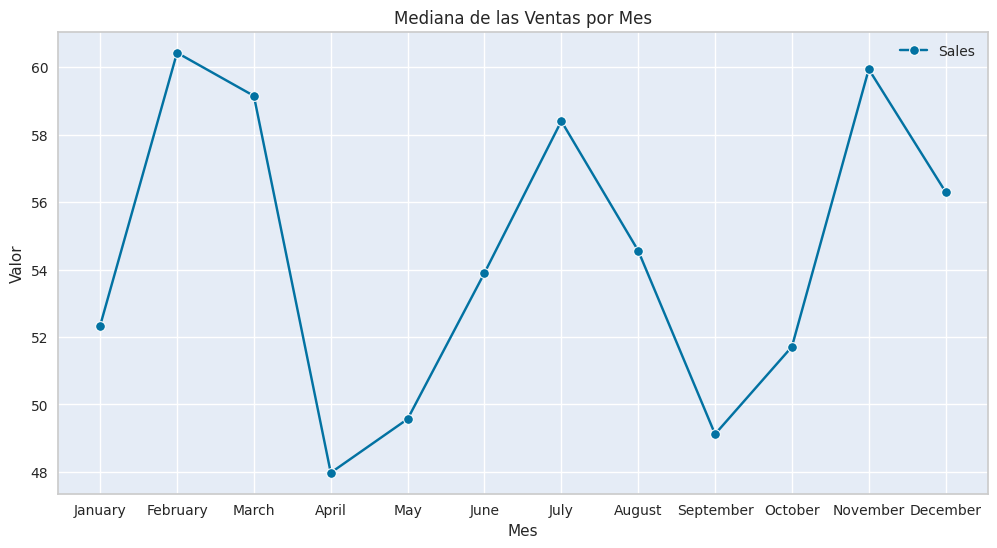

In [ ]:
medianSalesMonth = data.groupby('Month Name')[['Sales']].median()
medianSalesMonth = medianSalesMonth.reindex(ordenar, axis=0)
plt.figure(figsize=(12,6))
a = sns.lineplot(data=medianSalesMonth, markers=True, legend=True)
a.set_xlabel("Mes")
a.set_ylabel("Valor")
a.set_title("Mediana de las Ventas por Mes")
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.show()

La mediana de las ventas por mes está entre 50 y 60.

In [ ]:
salesRegion = data.groupby('Region')['Sales'].sum().reset_index()
fig = px.pie(salesRegion, values='Sales', names='Region', title='Distribución de Ventas por Region', hole=0.4)
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

Pregunta 2. ¿Qué regiones están obteniendo buenos resultados y cuáles necesitan mejorar en términos de ventas?

Respuesta, en el grafico podemos notar que la region que mejores resultados es la region `West` con un 31.6% del total, esto puede deberse a que es una region prospera y con alto poder adquisitivo. Le sigue la region `East` con un 29.5% que no se queda atras por ser la region mas grande y poblada de EEUU, por lo que es probable que tenga un mayor mercado de ventas. Y por ultimo las regiones que necesitan mejorar en terminos de ventas son region `Central` y `South` que en teoria son regiones mas pequeñas y menos pobladas.

In [ ]:
profitRegion = data.groupby('Region')['Profit'].sum().reset_index()
fig = px.pie(profitRegion, values='Profit', names='Region', title='Distribución de Ganancias por Región', hole=0.4)
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

En cuanto a las ganancias, las regiones mantienen el mismo orden.

In [ ]:
salesProfitStates = data.groupby('State')[['Profit', 'Sales']].sum().reset_index()
fig = px.bar(salesProfitStates, x='State', y=['Profit', 'Sales'], title='Profit and Sales by State', barmode='group')
fig.update_layout(xaxis_title='States', yaxis_title='Value', title_x=0.45, height=600, width=1100, title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Para complementar la respuesta de la pregunta 2 podemos confirmar la hipotesis, ya que las mayores ventas y ganancias estan en los estados de `New York` y  `California`. Estados mas prosperos en el pais.

In [ ]:
salesCity = data.groupby('City')[['Sales']].sum().reset_index()
salesCity = salesCity.sort_values(by='Sales', ascending=False)
top15 = salesCity.head(15)
fig = px.bar(top15, x=['Sales'], y='City', orientation='h',color='City')
fig.update_layout(title="Top 15 Distribución de Ventas por Ciudad", title_x=0.45, width=1100, title_font=dict(size=24, family="Arial", color="black"))
fig.update_traces(marker_color=px.colors.qualitative.Pastel)
fig.show()

En ese grafico de igual manera podemos confirmar que las mayores ventas estan en los estados de `New York City` y `Los Angeles` como lo habiamos confirmado en las visualizaciones anteriores. Como ciudades que deben mejorar en sus ventas estan las ciudades de `Lafayette`, `Columbia`, `Newark` entre otras que pertenecen a la region `Central` y `South` del pais.

In [ ]:
salesProfitSegment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=salesProfitSegment['Segment'], y=salesProfitSegment['Sales'], name='Sales'))
fig.add_trace(go.Bar(x=salesProfitSegment['Segment'], y=salesProfitSegment['Profit'], name='Profit'))
fig.update_layout(height=600, width=1100, title='Ventas y Ganancias por Segmento de Cliente', xaxis_title='Segment', yaxis_title='Monto', title_x=0.5, title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Pregunta 3. ¿Qué segmentos de clientes son más propensos a comprar en cada región?

Respuesta, como se puede apreciar en general los clientes mas propensos a comprar son los `Consumer` por ende la mayor cantidad de ganancias se genera por las compras de este segmento de clientes.

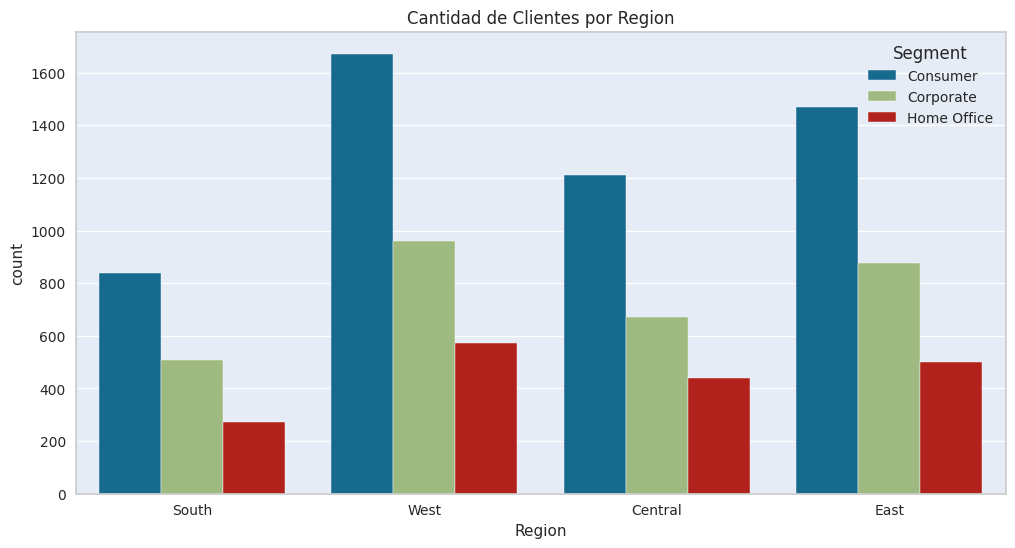

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data, x='Region', hue='Segment')
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.title('Cantidad de Clientes por Region')
plt.show()

Como notamos en el grafico anterior que los clientes mas propensos a comprar son los `Consumer`, pero analizando este grafico podemos confirmar que en todas las regiones la mayor cantidad de clientes son `Consumer`, por lo que se le recomendaria a la organizacion hacer el esfuerzo de captar mas clientes como `Corporate` ya que quizas el monto de las ventas que se le realicen a estas sean mucho mayores, mejorando asi los margenes.

In [ ]:
categorySalesProfit = data.groupby('Category')[['Profit','Sales']].sum().reset_index()
fig = px.bar(categorySalesProfit, x='Category', y=['Profit','Sales'], title='Ventas y Ganancias por Categoria', barmode='group')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Pregunta 4. ¿Qué categoría de productos genera las mayores ingresos y ganancias?

Respuesta, como pudimos ver en la distribucion de datos de la columna categoria (mas arriba), la categoria con mayor cantidad de ventas es la de `Office Supplies` y esto se debe a que tiene mayor cantidad de productos. A pesar de que la categoria `Technology` es la que tiene menos productos es la que mayores ingresos y ganancias genera, podria ser porque los articulos electronicos son mucho mas costosos y comerciales.

In [ ]:
subCategorySalesProfit = data.groupby('Sub-Category')[['Profit','Sales']].sum().reset_index()
fig = px.bar(subCategorySalesProfit, x='Sub-Category', y=['Profit', 'Sales'], title='Ventas y Ganancias por Sub-Categoria', barmode='group')
fig .update_layout(title_x=0.45, height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Como podemos notar en este grafico y como se comento en el grafico anterior los productos que mas ingresos generan en la categoria technology son los `Phones`, `Machines` y `Copies` estos por ser mas costosos, en cambio el unico producto que deja mayores ingresos en la categoria de Office Supplies es `Binders`. Ojo que el segundo producto mas rentable son las `Chairs` pero esta pertenece a la categoria Furniture.

In [ ]:
scatter_plot = px.scatter(data, x='Sub-Category', y='Sales', title='Distribución de Productos por Sub-Categoria', color='Category',)
scatter_plot.update_layout(title_font_family="Arial", title_font_size=24, title_font_color="black", title_x=0.5, height=600, width=1100)
scatter_plot.show()

En este grafico puedo confirmar que productos pertenecen a que Categoria.

**Conclusión**

En base al proposito inicial de esta investigacion y despues de haber analizado y visualizado la distribucion de los datos, despues de haber respondido las preguntas e hipotesis planteadas. Podemos concluir lo siguiente:

Para poder minimizar las perdidas, la tienda deberia de dejar de vender a ciertos estados donde se estan teniendo perdidas, como lo vimos en el grafico de `Ventas / Ganancias por Estado` (Texas, Ohio, Pensylvania o Colorado son los estados con mas perdidas). Tambien se podrian aplicar distintas tecnicas de marketing para tratar de hacer mas rentable la operacion en estos estados.

Dejar de vender productos no rentables o mejorar su precio de venta, aplicar mas descuentos en estos (Tables con mayor perdida de la categoria Furniture).

Por lo tanto las pérdidas se pueden atribuir a los tipos de artículos que se venden a los clientes en estos estados o a que los costos de envío a ciertas áreas son mas costosos y por eso se están reduciendo sus ganancias.

#**Feature Engineering**

In [ ]:
#Creamos nuevas variables.
data['Profit Margin'] = data['Profit']/data['Sales']
data['Discount Profit'] = data['Profit']-data['Profit']*data['Discount']
data['Discount Percentage'] = data['Discount']/data['Sales']*100
data['Operating Expenses'] = data['Sales'] - data['Profit']
data['Net Profit'] = data['Profit'] - data['Discount']
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Discount,Profit,Year,Month,Month Name,Profit Margin,Discount Profit,Discount Percentage,Operating Expenses,Net Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,41.9136,2016,11,November,0.1600,41.91360,0.000000,220.0464,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,219.5820,2016,11,November,0.3000,219.58200,0.000000,512.3580,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.00,6.8714,2016,6,June,0.4700,6.87140,0.000000,7.7486,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.45,-383.0310,2015,10,October,-0.4000,-210.66705,0.046994,1340.6085,-383.4810
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.20,2.5164,2015,10,October,0.1125,2.01312,0.894134,19.8516,2.3164


✅ Transformación de Variables Categoricas

In [ ]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [ ]:
# Convertir la columna de tipo datetime a tipo object, ya que al aplicar labelEncoder me dejaba esas columnas con formato de fecha.
data['Order Date'] = data['Order Date'].astype('object')
data['Ship Date'] = data['Ship Date'].astype('object')

In [ ]:
# Convertimos valores categoricos a numericos (Encoding).
le = LabelEncoder()
for i in data.columns:
    if(data.dtypes[i] == 'object'):
        data[i] = le.fit_transform(data[i])

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Discount,Profit,Year,Month,Month Name,Profit Margin,Discount Profit,Discount Percentage,Operating Expenses,Net Profit
0,1,2500,864,929,2,143,166,0,0,194,...,0.00,41.9136,2016,11,9,0.1600,41.91360,0.000000,220.0464,41.9136
1,2,2500,864,929,2,143,166,0,0,194,...,0.00,219.5820,2016,11,9,0.3000,219.58200,0.000000,512.3580,219.5820
2,3,2296,732,787,2,237,201,1,0,266,...,0.00,6.8714,2016,6,6,0.4700,6.87140,0.000000,7.7486,6.8714
3,4,4372,519,568,3,705,687,0,0,153,...,0.45,-383.0310,2015,10,10,-0.4000,-210.66705,0.046994,1340.6085,-383.4810
4,5,4372,519,568,3,705,687,0,0,153,...,0.20,2.5164,2015,10,10,0.1125,2.01312,0.894134,19.8516,2.3164


✅ Tratamiento de Outliers en `Sales` y `Profit`

In [ ]:
sales = go.Box(x=data['Sales'],name='Sales ')
profit = go.Box(x=data['Profit'],name='Profit')
fig = make_subplots(rows=1, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(profit, row = 1, col = 2)
fig.update_layout(height=400, width=1100, title_text = 'Representación de los Outliers', title_font_size = 24, title_x=0.45)
fig.show()

In [ ]:
print("Antiguos: ", data.shape[0])
data.drop(index= data[(data['Sales'] > 3000)].index, inplace=True)
data.drop(index= data[(data['Profit'] > 1000) | (data['Profit'] < -500)].index, inplace=True)
print("Nuevos: ", data.shape[0])

Antiguos:  9994
Nuevos:  9882


In [ ]:
sales = go.Box(x=data['Sales'],name='Sales ')
profit = go.Box(x=data['Profit'],name='Profit')
fig = make_subplots(rows=1, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(profit, row = 1, col = 2)
fig.update_layout(height=400, width=1100, title_text = 'Representación de los Outliers', title_font_size = 24, title_x=0.45)
fig.show()

In [ ]:
#Normalizamos con el metodo de Standard Scaler
sc = StandardScaler()
x = data.drop(['Sales'] , axis = 1).values
y =data['Sales'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#Utilizamos el metodo SelectKBest para seleccionar aquellas variables que tienen mayor relación con nuestra variable objetivo.
kbest = SelectKBest(score_func=f_regression, k=15)
x_train_kbest = kbest.fit_transform(x_train, y_train)
x_test_kbest = kbest.transform(x_test)

#**Entrenamiento y Testeo de los Modelos**

✅ Despues de realizar pruebas con varios modelos de ML seleccione los dos que mejores resultado han entregado `Random Forest Regressor` y `LGBMRegressor`.

✅ Definiremos una función que entrena un modelo de aprendizaje automático, evalúa su rendimiento en un conjunto de prueba y guardaremos las métricas de evaluación.

In [ ]:
models = []
mae_scores = []
mse_scores = []
rmse_scores = []
mape_scores = []
r2_scores = []
training_times = []

In [ ]:
def train_and_evaluate(model):
    start_time = time.time()
    model.fit(x_train_kbest, y_train)
    duration = time.time() - start_time
    y_pred = model.predict(x_test_kbest)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAPE:", mape)
    print("R2 Score:",r2)
    print("Training Time:", duration)

    training_times.append(duration)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mape_scores.append(mape)
    r2_scores.append(r2)
    models.append(model)

    try:
        prediction_error = PredictionError(estimator = model)
        prediction_error.score(x_test_kbest, y_test)
        prediction_error.show()
        res_plot = ResidualsPlot(estimator = model)
        res_plot.score(x_test_kbest, y_test)
        res_plot.show()
        del r2, mae, mape, rmse, duration, prediction_error, res_plot
    except Exception as e:
        pass
    gc.collect()

MAE: 5.569338404147699
MSE: 363.98989777519654
RMSE: 19.078519276274996
MAPE: 0.04538193704177872
R2 Score: 0.9970673672040506
Training Time: 12.577125549316406


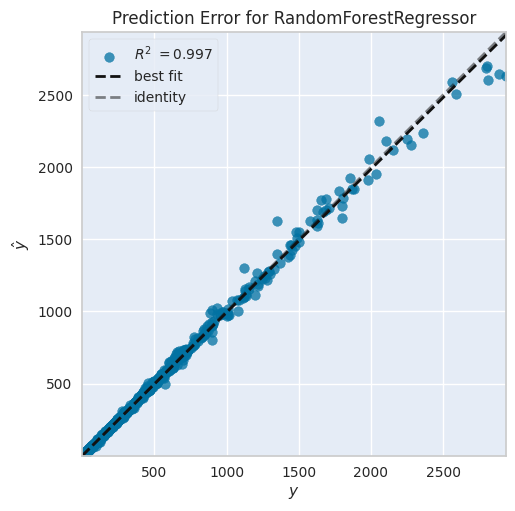

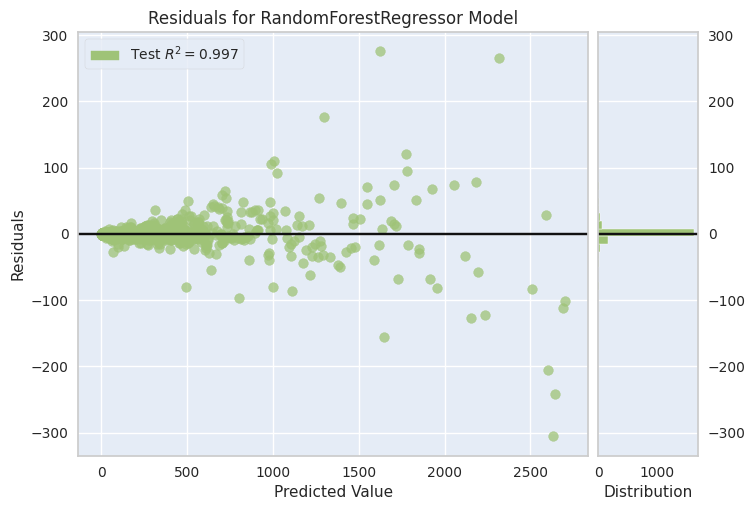

In [ ]:
train_and_evaluate(RandomForestRegressor())           # Entrenamos y evaluamos el modelo con RandomForestRegressor.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2317
[LightGBM] [Info] Number of data points in the train set: 7905, number of used features: 15
[LightGBM] [Info] Start training from score 188.941351
MAE: 6.715576031825464
MSE: 557.2753283404057
RMSE: 23.60667973986189
MAPE: 0.08353517784072904
R2 Score: 0.9955100844439537
Training Time: 0.20212769508361816


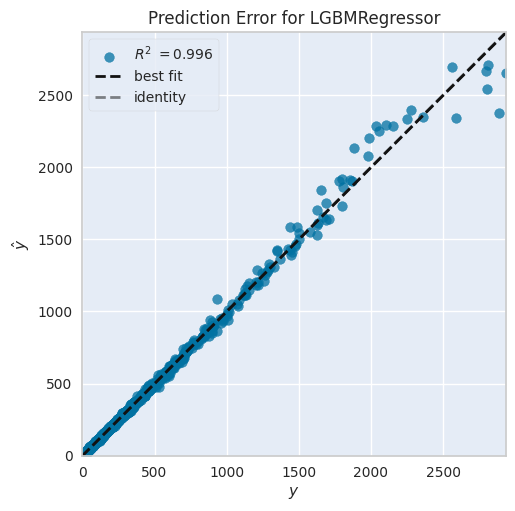

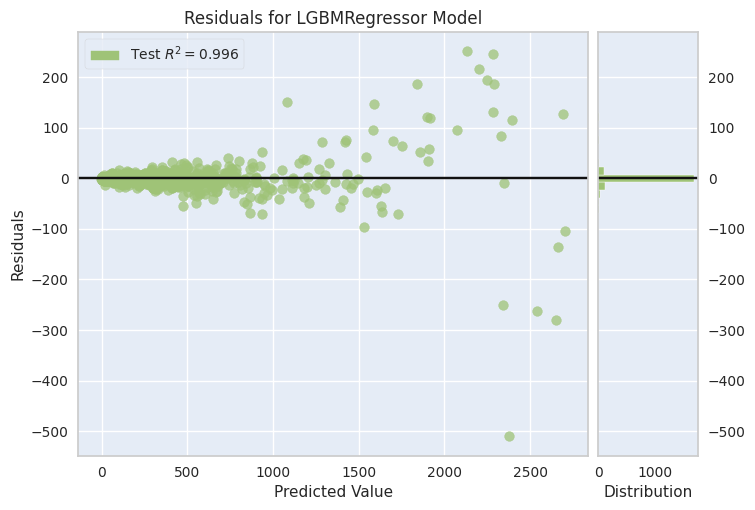

In [ ]:
train_and_evaluate(LGBMRegressor())           # Entrenamos y evaluamos el modelo con LGBMRegressor.

In [ ]:
performances = pd.DataFrame({'Model': models,
                            'R2': r2_scores,
                            'MAE': mape_scores,
                            'MSE': mse_scores,
                            'RMSE': rmse_scores,
                            'Training Time': training_times}).sort_values('R2', ascending=False).reset_index(drop=True)
performances

,Model,R2,MAE,MSE,RMSE,Training Time
0,"(DecisionTreeRegressor(max_features=1.0, rando...",0.997067,0.045382,363.989898,19.078519,12.577126
1,LGBMRegressor(),0.995510,0.083535,557.275328,23.606680,0.202128


✅ Observando el resultado de ambos modelos en este punto podemos comentar que las métricas indican que el modelo `RandomForestRegressor` tiene un buen rendimiento en términos de precisión y capacidad para explicar la variabilidad en los datos, con errores bajos y un alto coeficiente de determinación (R2), mientras que el modelo `LGBMRegressor` tambien tiene un rendimiento muy bueno, aunque ligeramente inferior al de Random Forest, tambien se debe considerar que el tiempo de entrenamiento más rápido puede ser una ventaja en situaciones donde se requiera un tiempo de respuesta rápido.

✅Cross Validation (Modelo con Random Forest)

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=4)
scores = cross_val_score(rfr, x_train_kbest, y_train, cv=10, verbose=1, scoring='r2') #Utilizamos 10 folds (particiones) en la validación cruzada, con los datos de entrenamiento.

In [ ]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.97 de r2 promedio con una desviacion estandar de 0.00


In [ ]:
rfr = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=4)
scores = cross_val_score(rfr, x_test_kbest, y_test, cv=10, verbose=1, scoring='r2') #Utilizamos 10 folds (particiones) en la validación cruzada, con los datos de prueba.

In [ ]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.97 de r2 promedio con una desviacion estandar de 0.01


La puntuación R2 de validación cruzada del modelo Random Forest Regressor en el conjunto de prueba es comparable a la puntuación R2 de validación cruzada de entrenamiento, por lo que no parece haber OverFitting.

✅Cross Validation (LigthGBM Regressor)

In [ ]:
gbm = LGBMRegressor(random_state=42, n_estimators=10, max_depth=4)
scores = cross_val_score(gbm, x_train_kbest, y_train, cv=10, verbose=1, scoring='r2') #Utilizamos 10 folds (particiones) en la validación cruzada, con los datos de entrenamiento.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2314
[LightGBM] [Info] Number of data points in the train set: 7114, number of used features: 15
[LightGBM] [Info] Start training from score 188.280995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhe

In [ ]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.86 de r2 promedio con una desviacion estandar de 0.01


In [ ]:
gbm = LGBMRegressor(random_state=42, n_estimators=10, max_depth=4)
scores = cross_val_score(gbm, x_test_kbest, y_test, cv=10, verbose=1, scoring='r2') #Utilizamos 10 folds (particiones) en la validación cruzada, con los datos de prueba.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2274
[LightGBM] [Info] Number of data points in the train set: 1779, number of used features: 15
[LightGBM] [Info] Start training from score 191.829929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.84 de r2 promedio con una desviacion estandar de 0.04


Al igual que con Random Forest el modelo con LigthGBM Regressor tuvo una puntuación R2 de validación cruzada en el conjunto de prueba es comparable a la puntuación R2 de validación cruzada de entrenamiento, por lo que no parece haber OverFitting. Sin embargo el Modelo Random Forest tuvo un mayor rendimiento.

# **Optimización**

✅ Para optimizar y ajustar los hiperparametros de nuestros modelos usaremos el metodo de Busqueda Aleatoria o `RandomizedSearchCV`

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, criterion=poisson, max_features=log2, max_samples=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=  16.0s
[CV] END bootstrap=True, criterion=poisson, max_features=log2, max_samples=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=  15.8s
[CV] END bootstrap=True, criterion=poisson, max_features=log2, max_samples=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=  16.0s
[CV] END bootstrap=True, criterion=poisson, max_features=log2, max_samples=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=  16.1s
[CV] END bootstrap=True, criterion=poisson, max_features=log2, max_samples=0.75, n_estimators=800, oob_score=True, warm_start=False; total time=  17.0s
[CV] END bootstrap=False, criterion=squared_error, max_features=log2, max_samples=1.0, n_estimators=500, oob_score=False, warm_start=False; total time=   0.0s
[CV] END bootstrap=F

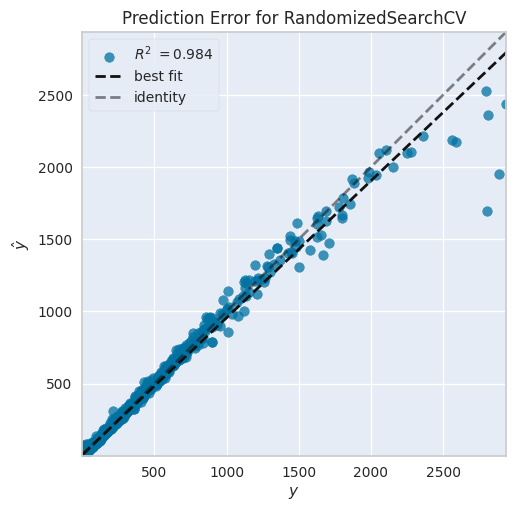

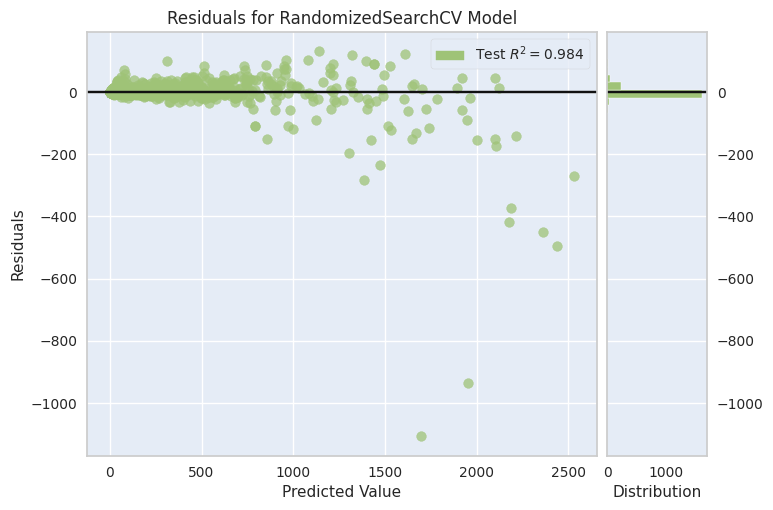

In [ ]:
rfr_param_grid = {
    'n_estimators': [200,500,800,1000],
    'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
    'max_features': ['auto','sqrt','log2'],
    'bootstrap': [True,False],
    'oob_score': [True,False],
    'warm_start': [True,False],
    'max_samples': [0.25,0.5,0.75,1.0]
}

grid_rfr = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = rfr_param_grid, verbose=2, return_train_score=True, scoring='r2')
train_and_evaluate(grid_rfr)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there ar

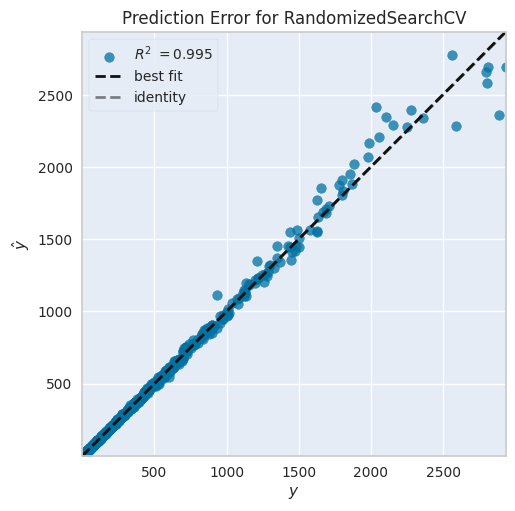

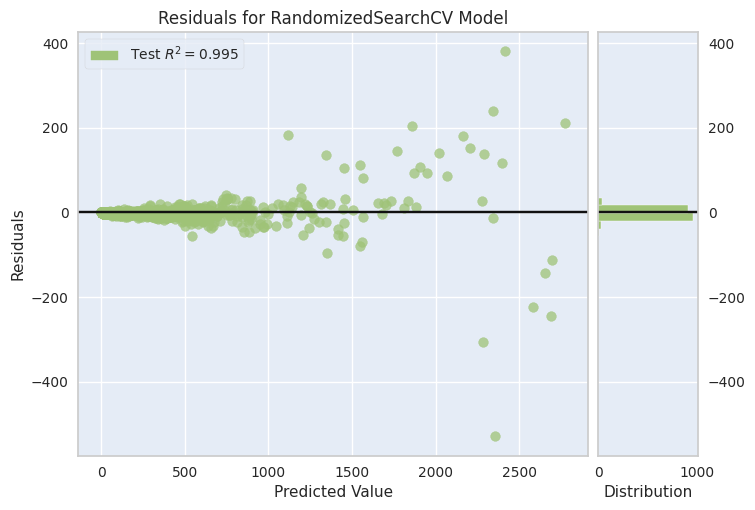

In [ ]:
lgbm_param_grid = {'boosting_type': ['gbdt','dart','goss','rf'],
            'learning_rate': np.linspace(0,1,6)[1:],
            'n_estimators': [100,300,500,800,1000],
            'importance_type': ['split','gain'],
            'min_split_gain': [0.68,0.79,0.87,1]}

grid_lgbm = RandomizedSearchCV(LGBMRegressor(), lgbm_param_grid, verbose=3, cv=5)
train_and_evaluate(grid_lgbm)

In [ ]:
optim_model = pd.DataFrame({'Model': models,
                            'R2': r2_scores,
                            'RMSE': rmse_scores,
                            'MAPE': mape_scores,
                            'MSE': mse_scores,
                            'Training Time': training_times}).sort_values('R2',ascending=False).reset_index(drop=True)
optim_model

,Model,R2,RMSE,MAPE,MSE,Training Time
0,"(DecisionTreeRegressor(max_features=1.0, rando...",0.997067,19.078519,0.045382,363.989898,12.577126
1,LGBMRegressor(),0.995510,23.606680,0.083535,557.275328,0.202128
2,"RandomizedSearchCV(cv=5, estimator=LGBMRegress...",0.995261,24.253111,0.063360,588.213390,159.689815
3,RandomizedSearchCV(estimator=RandomForestRegre...,0.984435,43.952525,0.176444,1931.824482,894.867624


# **Selección del Modelo**

✅ Al analizar los resultados despues de optimizar los modelos podemos concluir que el modelo con mejor rendimiento es el de `LGBMRegressor` ya que tiene un rendimiento ligeramente mejor en términos de MAE, MSE, RMSE y MAPE, con un R2 Score también muy alto. Además, el tiempo de entrenamiento del modelo es considerablemente menor que el del modelo `RandomForestRegressor`, lo que indica que el modelo `LGBMRegressor` es más eficiente en términos de tiempo de entrenamiento.

Sin embargo, es importante tener en cuenta otros factores, como la interpretabilidad del modelo y la sensibilidad a los datos, al tomar una decisión final sobre qué modelo utilizar.

Pero para nuestra investigación el modelo que mejor se ajusta para la predicción de las ventas de esta Super Tienda es `LGBMRegressor`